In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data=pd.read_csv("C:/Users/dcb/Diabetes Prediction/diabetic_data_initial.csv")
data.head(20)

#pretty messy dataset, lots of missing values and a lot of categorical variables

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [136]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [137]:
#remove column with nulls and ID column
data.drop(data.columns[[0,1]], axis=1, inplace=True)
cols = data.columns
data[cols] = data[cols].replace({'?':np.nan, 0:np.nan})

#lets flag some strongly correlated diagnosis codes (added after score not great)
diag_codes =["428","403","491","585","250.6","250.4","536","250.41","250.42"]

data['diagflag'] = data.isin(diag_codes).any(1).astype(int)

#variables below have very low response rates, so will remove for modelling
#citoglipton all no
#glipizide-metformin 12 steady
#glimepiride-pioglitazone one steady
#metformin-rosiglitazone two steady
#metformin-pioglitazone one steady
#chlorpropamide 60 steady
#acetohexamide 1 steady
#tolbutamide 20 steady
#miglitol 20 steady
#troglitazone 3 steady'
#tolazamide 30 steady
#examide all no
#diabetesMed yes/no

data = data.drop(['diag_1','diag_2', 'diag_3','citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
                  'chlorpropamide', 'acetohexamide', 'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton'], axis=1)

#Recode yes/no to numeric
data['diabetesMed']=data['diabetesMed'].map(dict(Yes=1, No=0))
data['change']=data['change'].map(dict(Ch=1, No=0))


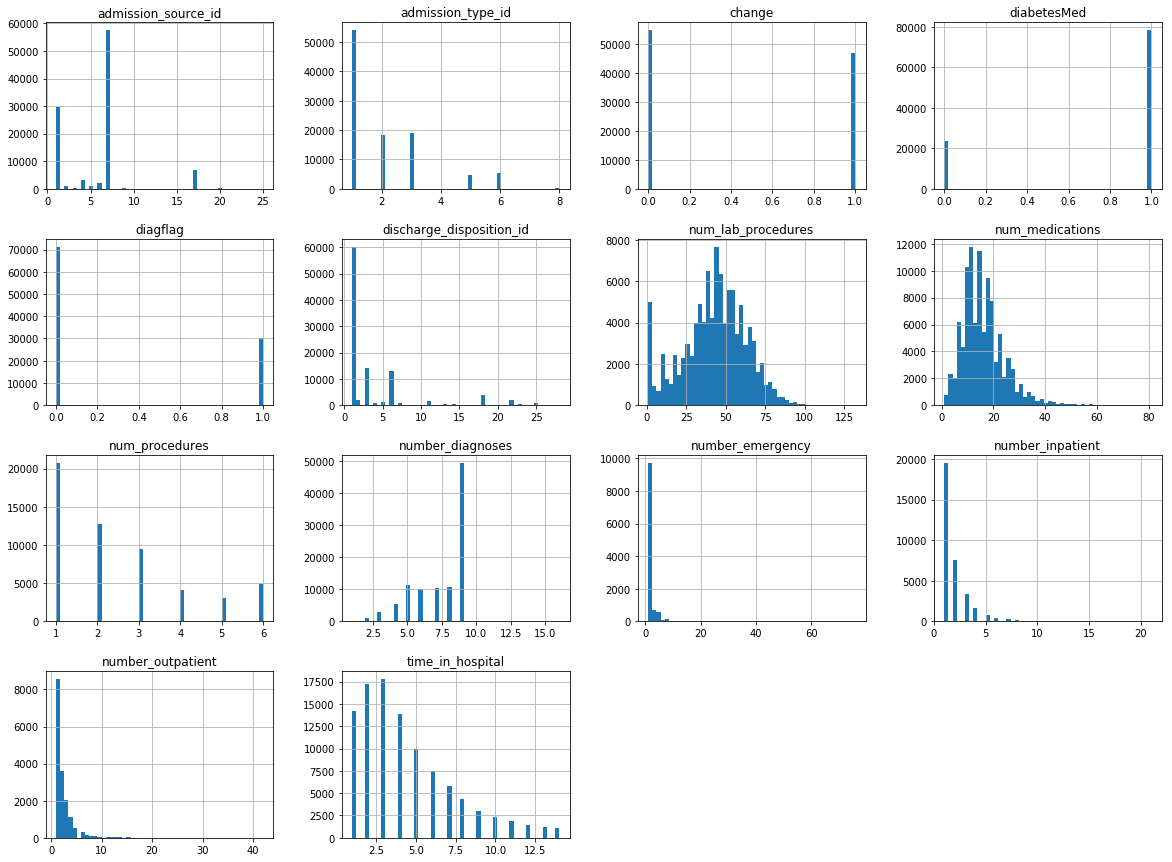

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 34 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null float64
discharge_disposition_id    101766 non-null float64
admission_source_id         101766 non-null float64
time_in_hospital            101766 non-null float64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null float64
num_procedures              55114 non-null float64
num_medications             101766 non-null float64
number_outpatient           16739 non-null float64
number_emergency            11383 non-null float64
number_inpatient            34136 non-null float64
number_diagnoses            101766 non-null float64
max_glu_serum       

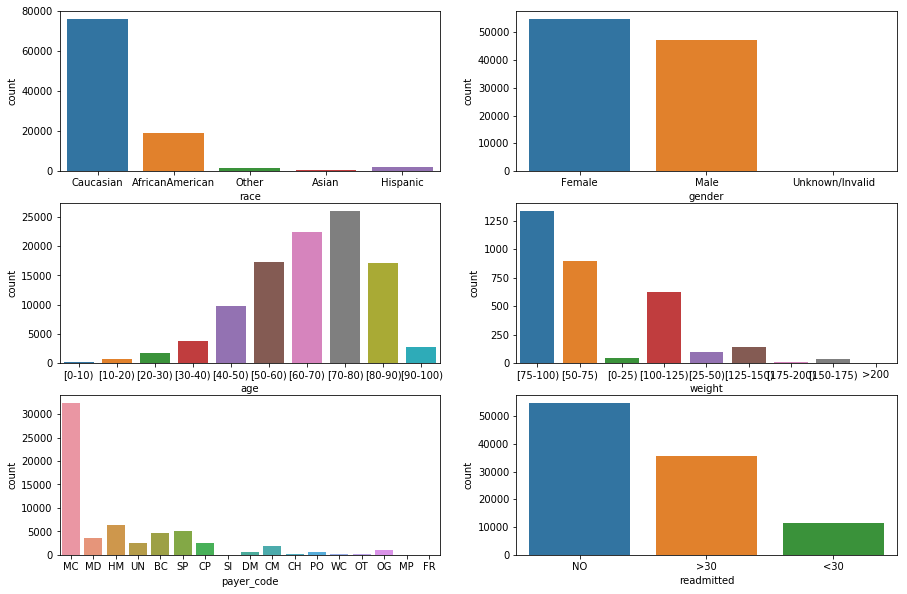

In [165]:
# library and data
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=3)
# plot
sns.countplot(x="race", data=data, ax=ax[0][0])
sns.countplot(x="gender", data=data, ax=ax[0][1])
sns.countplot(x="age", data=data, ax=ax[1][0])
sns.countplot(x="weight", data=data, ax=ax[1][1])
sns.countplot(x="payer_code", data=data, ax=ax[2][0])
sns.countplot(x="readmitted", data=data, ax=ax[2][1])

In [166]:
#create dummy variables for modelling
target=data["readmitted"]
data=pd.get_dummies(data.loc[:, data.columns != "readmitted"])

In [167]:
data['target']=target

In [168]:
data.head(10)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,acarbose_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,target
0,6.0,25.0,1.0,1.0,41.0,NaN,1.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,NO
1,1.0,1.0,7.0,3.0,59.0,NaN,18.0,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,>30
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,NaN,1.0,...,0,0,1,0,0,0,1,0,0,NO
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,NO
4,1.0,1.0,7.0,1.0,51.0,NaN,8.0,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,NO
5,2.0,1.0,2.0,3.0,31.0,6.0,16.0,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,>30
6,3.0,1.0,2.0,4.0,70.0,1.0,21.0,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,NO
7,1.0,1.0,7.0,5.0,73.0,NaN,12.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,>30
8,2.0,1.0,4.0,13.0,68.0,2.0,28.0,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,NO
9,3.0,3.0,4.0,12.0,33.0,3.0,18.0,NaN,NaN,NaN,...,0,0,0,1,0,0,1,0,0,NO


In [169]:
#split dataset for training and testing
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [170]:
# lets look at some incomplete data before we start
numeric_data=train_set._get_numeric_data()
sample_incomplete_rows = numeric_data[numeric_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,acarbose_Steady,acarbose_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
24079,1.0,1.0,7.0,4.0,48.0,NaN,11.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
98079,1.0,1.0,7.0,1.0,42.0,NaN,5.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
6237,1.0,1.0,7.0,4.0,44.0,NaN,10.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
72208,1.0,3.0,7.0,3.0,54.0,NaN,8.0,NaN,NaN,NaN,...,0,0,0,0,1,0,0,1,0,0
33075,1.0,11.0,7.0,11.0,35.0,3.0,23.0,NaN,NaN,1.0,...,0,0,0,1,0,0,0,1,0,0


In [171]:
#impute the numeric data using the imputer, will visit for more specific imputing but best to get a model running first.
has_missing=numeric_data.columns[numeric_data.isna().any()].tolist()
for c in has_missing:
    median = train_set[c].median()
    train_set[c].fillna(median, inplace=True) # option 3

train_set.head(10)

C:\Users\dcb\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,acarbose_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,target
24079,1.0,1.0,7.0,4.0,48.0,2.0,11.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO
98079,1.0,1.0,7.0,1.0,42.0,2.0,5.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,>30
6237,1.0,1.0,7.0,4.0,44.0,2.0,10.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO
72208,1.0,3.0,7.0,3.0,54.0,2.0,8.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,NO
33075,1.0,11.0,7.0,11.0,35.0,3.0,23.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO
12913,3.0,18.0,1.0,4.0,24.0,6.0,11.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO
81022,1.0,6.0,7.0,6.0,45.0,2.0,24.0,1.0,1.0,3.0,...,0,0,0,1,0,0,1,0,0,>30
79358,1.0,6.0,7.0,8.0,57.0,5.0,19.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,NO
60741,1.0,1.0,7.0,1.0,56.0,2.0,4.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,NO
62297,2.0,2.0,7.0,5.0,36.0,6.0,12.0,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,>30


In [102]:
#Better create a pipeline so the data can be easily processed for the train and test set.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from sklearn.pipeline import TransformerMixin
    
class DataFrameSelectorCat(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].astype(str)

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

cols = train_set.columns
num_attribs = train_set._get_numeric_data().columns
cols_list=list(cols)
cat_attribs = [x for x in cols_list if x not in num_attribs]
#cat_attribs =['weight','gender','race']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelectorCat(cat_attribs)),
        #('smarties', Smarties()),
        #('label_binarizer', MultiColumnLabelEncoder()),
    ])

data_num_tr = num_pipeline.fit_transform(numeric_data)
data_num_tr

array([[-0.70810806, -0.5136588 ,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [-0.70810806, -0.5136588 ,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [-0.70810806, -0.5136588 ,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       ...,
       [ 0.67957442, -0.13560719, -1.17014442, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [ 2.76109813,  4.02296059,  0.30695872, ...,  0.08478111,
        -0.0838205 , -0.00991339],
       [ 2.76109813, -0.5136588 ,  2.76879729, ...,  0.08478111,
        -0.0838205 , -0.00991339]])

In [103]:
data_cat_tr=cat_pipeline.fit_transform(train_set)
#data_cat_tr=(df.apply(LabelEncoder().fit_transform))


In [104]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])

In [105]:
train_prepared = full_pipeline.fit_transform(train_set)
train_prepared.shape

(81412, 183)

In [106]:
y_train=train_prepared[:, 182]
y_train

array(['NO', '>30', 'NO', ..., 'NO', '>30', 'NO'], dtype=object)

In [107]:
x_train=train_prepared[:,:182]
x_train.shape

(81412, 182)

In [108]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(x_train, y_train)
y_pred=sgd_clf.predict(x_train)

In [109]:
from  sklearn.metrics  import accuracy_score
accuracy_score(y_train, y_pred)

0.5066206456050705

In [110]:
test_prepared = full_pipeline.transform(test_set)
test_prepared.shape

(20354, 183)

In [113]:
y_test=test_prepared[:, 182]
x_test=test_prepared[:,:182]

In [114]:
y_test_pred=sgd_clf.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.49926304411909206

In [115]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)
y_pred=forest_clf.predict(x_train)
accuracy_score(y_train, y_pred)

0.9870903552301872

In [116]:
y_test_pred=forest_clf.predict(x_test)
accuracy_score(y_test, y_test_pred)

0.5315908420949199

In [117]:
#This is taking too long so commented out, results are not good anyway
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
#knn_clf.fit(x_train, y_train)
#y_pred = knn_clf.predict(x_train)
#accuracy_score(y_train, y_pred)

In [118]:
#y_test_pred=knn_clf.predict(x_test)
#accuracy_score(y_test, y_test_pred)
#0.49 worse than a random model, not good. Will comment out. 

In [119]:
##Out of bag decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=200,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.5696580356704172

In [120]:
y_pred=bag_clf.predict(x_train)
accuracy_score(y_train, y_pred)

0.9999754335970127

In [121]:
#still real issues with overfitting the training set
y_pred = bag_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5705021126068586


In [123]:
## Ada boost using the Decision Tree from above, but let put max depth as 2 to try and get a better fit on the test data
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [124]:
y_pred = ada_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

#this is the best score I have so far, but still not a great score

0.5835707968949593


In [125]:
confusion_matrix(y_test, y_pred)

array([[  63,  851, 1371],
       [  57, 2515, 4545],
       [  30, 1622, 9300]], dtype=int64)

In [126]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('bag', bag_clf), ('ada', ada_clf), ('rand_frt', forest_clf)],
    voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('bag', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
    ...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [127]:
y_pred = voting_clf.predict(x_test)
accuracy_score(y_test, y_pred)
#voting doesn't get above 60%

C:\Users\dcb\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5768399331826668

In [128]:
#Calculate readmission within 30days, only comparable score I can find is this guy who is getting 60% for readmission within 30days
#https://github.com/prabhuvashwin/Data-Analysis-on-Hospital-Readmission-Data/blob/master/DiabetesProjectCode.R

y_train_readmitted= np.where(y_train=='NO', 'False', 'True')
y_test_readmitted= np.where(y_test=='NO', 'False', 'True')

In [130]:
ada_clf.fit(x_train, y_train_readmitted)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [131]:
y_pred = ada_clf.predict(x_test)
print(accuracy_score(y_test_readmitted, y_pred))
#We get get a slightly better score than him, but I'm not sure this is good enough to implement at a hospital.
#previous score before feature generation 0.6348629262061511

0.6373194458091775


In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_readmitted, y_pred)

array([[8051, 2901],
       [4481, 4921]], dtype=int64)